In [12]:
import asyncio
import subprocess
import io
from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np
from pyotritonclient import execute
from kaibu_utils import fetch_image

In [15]:
import numpy as np

def scale_to_uint8(array):
    """Given an input array, convert to uint8, including scaling to fill the
    0-255 range.

    Primarily used to convert general numpy arrays into an image rendering
    suitable dtype."""

    scaled = array.astype(np.float32)

    if scaled.max() - scaled.min() == 0:
        return np.zeros(array.shape, dtype=np.uint8)

    scaled = 255 * (scaled - scaled.min()) / (scaled.max() - scaled.min())

    return scaled.astype(np.uint8)

In [3]:
image = await fetch_image("https://static.imjoy.io/img/img02.png")
image = image.astype("float32")
print("example image downloaded: ", image.shape)
param = {"diameter": 30, "model_type": "cyto"}
# run inference
results = await execute([image.transpose(2, 0, 1), param],
                      server_url="https://hypha.bioimage.io/triton",
                      model_name="cellpose-python",
                      decode_bytes=True)
mask = results["mask"]
print("cellpose prediction: ", mask.shape)

example image downloaded:  (349, 467, 3)
cellpose prediction:  (1, 349, 467)


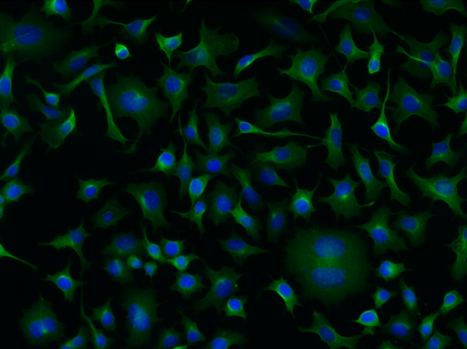

In [16]:
Image.fromarray(scale_to_uint8(image))

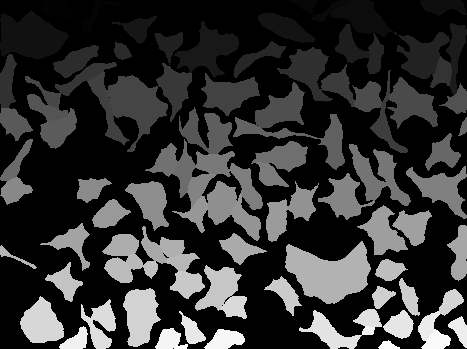

In [18]:
Image.fromarray(scale_to_uint8(mask[0,:,:]))

In [20]:
image = await fetch_image("https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/S-BIAD144-example.png")
image = image.astype("float32")
print("example image downloaded: ", image.shape)

example image downloaded:  (512, 512, 4)


In [25]:
param = {"diameter": 120, "model_type": "cyto"}
# run inference
results = await execute([image.transpose(2, 0, 1), param],
                      server_url="https://hypha.bioimage.io/triton",
                      model_name="cellpose-python",
                      decode_bytes=True)
mask = results["mask"]
print("cellpose prediction: ", mask.shape)

cellpose prediction:  (1, 512, 512)


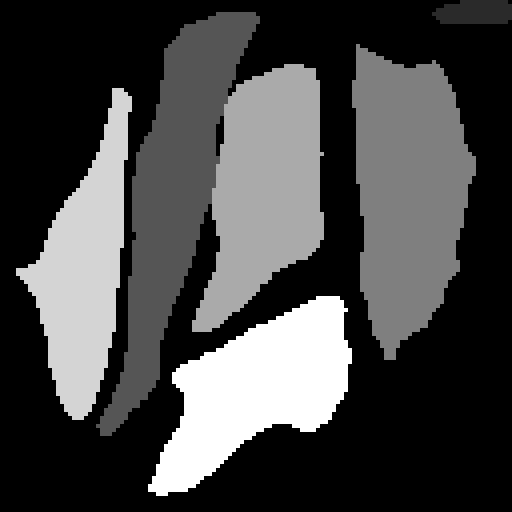

In [26]:
Image.fromarray(scale_to_uint8(mask[0,:,:]))

In [30]:
import skimage.segmentation

In [38]:
image_uint8 = scale_to_uint8(image[:,:,:3])
mask_uint8 = scale_to_uint8(mask[0,:,:])

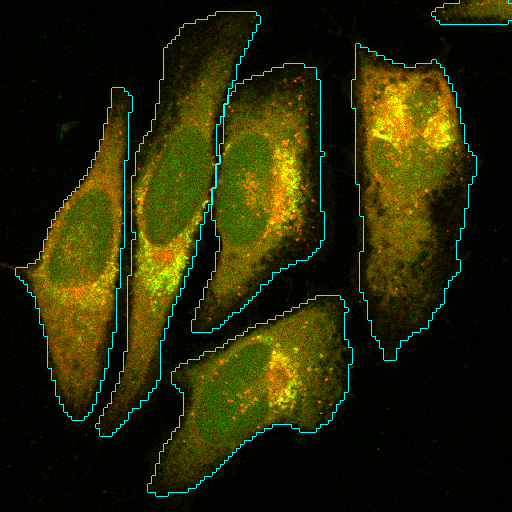

In [40]:
Image.fromarray(scale_to_uint8(skimage.segmentation.mark_boundaries(image_uint8, mask_uint8, color=[0,1,1])))

In [42]:
ome_zarr_uri = "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/S-BIAD144/IM1.zarr/0"

In [ ]:
import zarr
import dask.array as da

zgroup = zarr.open(ome_zarr_uri)
zarray = zgroup['0']

darray = da.from_zarr(zarray)

In [51]:
darray

dask.array<from-zarr, shape=(1, 2, 1, 512, 512), dtype=uint8, chunksize=(1, 1, 1, 512, 512), chunktype=numpy.ndarray>

In [65]:
cellpose_ready = darray[0,:,0,:,:].astype('float32').compute()

In [64]:
results = await execute([cellpose_ready, param],
                      server_url="https://hypha.bioimage.io/triton",
                      model_name="cellpose-python",
                      decode_bytes=True)
mask = results["mask"]
print("cellpose prediction: ", mask.shape)

cellpose prediction:  (1, 512, 512)


In [62]:
image_uint8 = scale_to_uint8(image[:,:,:3])
mask_uint8 = scale_to_uint8(mask[0,:,:])

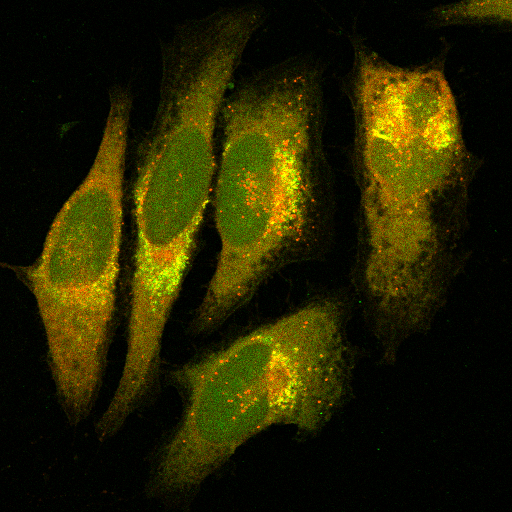

In [90]:
Image.fromarray(image_uint8)

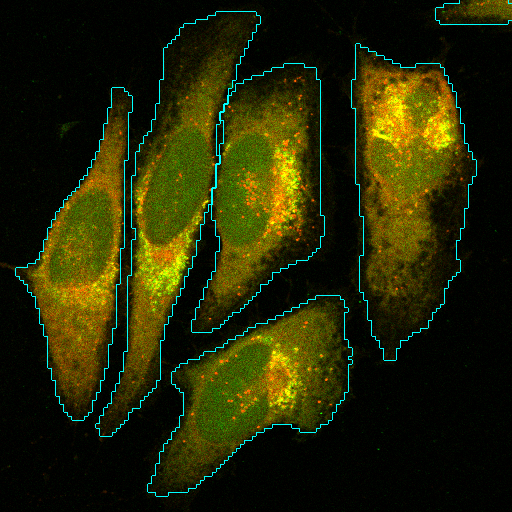

In [63]:
Image.fromarray(scale_to_uint8(skimage.segmentation.mark_boundaries(image_uint8, mask_uint8, color=[0,1,1])))

In [67]:
## Stardist?

In [68]:
ome_zarr_uri = "https://uk1s3.embassy.ebi.ac.uk/bia-integrator-data/S-BIAD623/040082a9-1c26-4cc6-bd9a-e60043cf9e6a/040082a9-1c26-4cc6-bd9a-e60043cf9e6a.zarr/0"

In [69]:
zgroup = zarr.open(ome_zarr_uri)
zarray = zgroup['0']

darray = da.from_zarr(zarray)

In [76]:
stardist_ready = darray[0,:,0,:,:].astype('float32').compute()

In [87]:
really_ready = np.expand_dims(stardist_ready.transpose(1, 2, 0), 2)

In [89]:
really_ready.shape

(400, 500, 1, 3)

In [88]:
results = await execute([really_ready, param],
                      server_url="https://hypha.bioimage.io/triton",
                      model_name="chatty-frog",
                      decode_bytes=True)
mask = results["mask"]
print("cellpose prediction: ", mask.shape)

IndexError: list index out of range